In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from utils import eda_helper_functions
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import IsolationForest
import sklearn

from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
    MinMaxScaler,
    PowerTransformer,
    FunctionTransformer
)

from feature_engine.outliers import Winsorizer
from feature_engine.datetime import DatetimeFeatures
from feature_engine.selection import SelectBySingleFeaturePerformance
from feature_engine.encoding import (
    RareLabelEncoder,
    MeanEncoder,
    CountFrequencyEncoder
)

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

In [3]:
# fetching the training data

training_data = pd.read_csv("../data/train_data.csv")
training_data.head(5)

,airline,source,destination,duration,total_stops,additional_info,dep_time_hour,dep_time_min,dtoj_day,dtoj_month,dtoj_year,price
0,Multiple Carriers,delhi,cochin,615,1,no info,15,15,6,6,2019,6795
1,Jet Airways,kolkata,banglore,1220,1,in-flight meal not included,20,0,9,6,2019,10844
2,Air India,banglore,new delhi,655,2,no info,10,30,15,3,2019,6593
3,Jet Airways,banglore,new delhi,1365,1,no info,8,55,6,3,2019,14815
4,Multiple Carriers,delhi,cochin,720,1,in-flight meal not included,9,0,27,5,2019,7886


In [4]:
X_train = training_data.drop(columns = ['price'])
y_train = training_data.price

### Outlier Analaysis

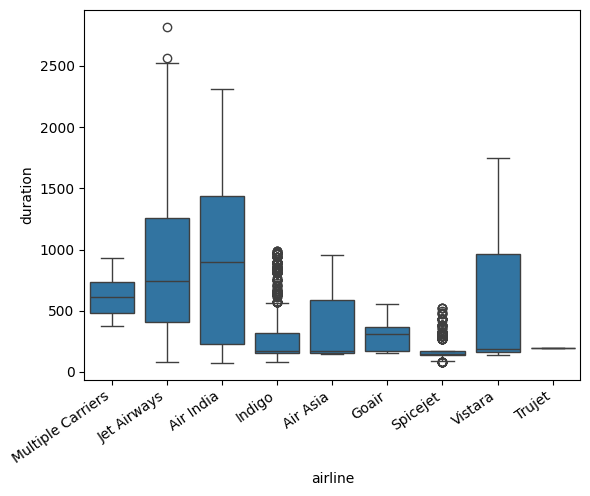

In [5]:
# Single Variate Outliers

sns.boxplot(data=X_train,x='airline',y='duration')

ax = plt.gca() # gca() is used to get the current axes
eda_helper_functions.rotate_xlabels(ax)

In [6]:
# Multivariate outliers

forest = IsolationForest(n_estimators=20,random_state=0)

(
  X_train.assign(outlier = forest.fit_predict(X_train[['duration','total_stops']]))
  .query('outlier == -1')
).shape

(2467, 12)

In [7]:
df1 = pd.DataFrame(y_train.to_list(),index = y_train.index,columns=['price'])
temp = pd.concat([X_train,df1],axis = 1)
temp.select_dtypes(include="int")

,duration,total_stops,dep_time_hour,dep_time_min,dtoj_day,dtoj_month,dtoj_year,price
0,615,1,15,15,6,6,2019,6795
1,1220,1,20,0,9,6,2019,10844
2,655,2,10,30,15,3,2019,6593
3,1365,1,8,55,6,3,2019,14815
4,720,1,9,0,27,5,2019,7886
...,...,...,...,...,...,...,...,...
6689,610,1,18,15,18,5,2019,12373
6690,660,1,20,10,6,3,2019,8627
6691,140,0,7,55,1,5,2019,3850
6692,520,1,8,35,9,6,2019,6853


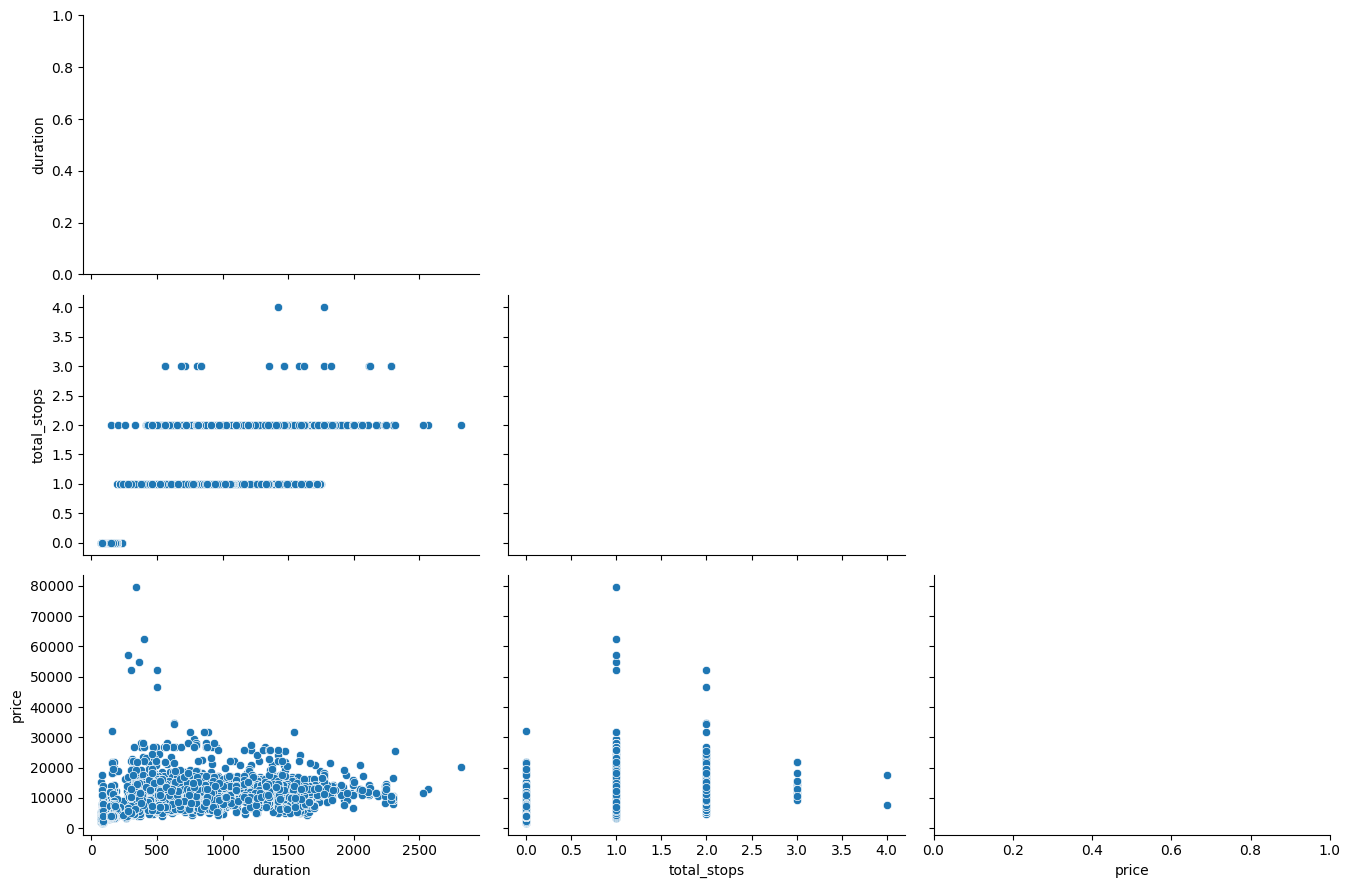

In [8]:
# Pairplots

eda_helper_functions.pair_plots(temp[['duration','total_stops','price']])

### Correlation analysis on Numerical columns

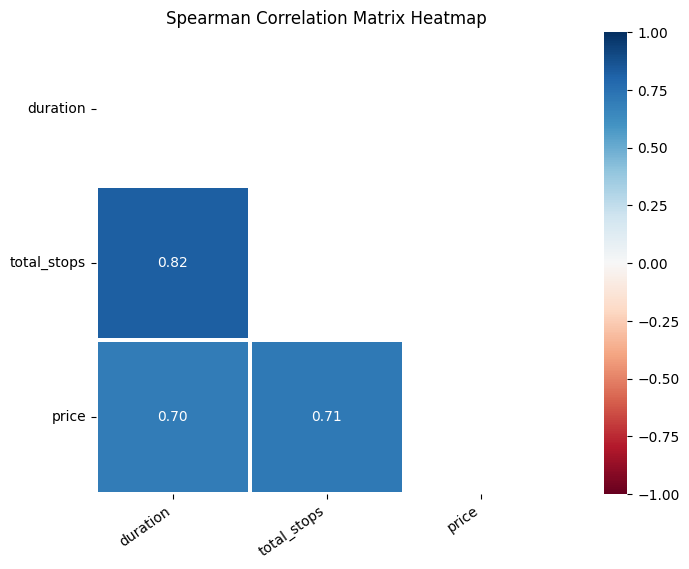

In [9]:
eda_helper_functions.correlation_heatmap(temp[['duration','total_stops','price']])

In [10]:
# The above plot shows high correlation in between them.

### Correlation analysis on categorical columns

In [11]:
# Checking the corelation in betweeen source and destination 
eda_helper_functions.cramers_v(temp,'source','destination')


np.float64(0.9999252476171635)

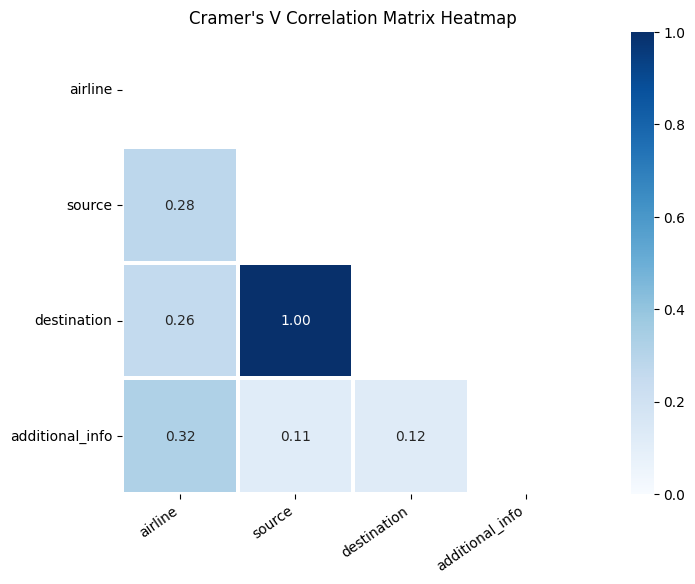

In [12]:
eda_helper_functions.cramersV_heatmap(temp)

### Detailed analysis on categorical columns

In [13]:
eda_helper_functions.cat_summary(X_train,'airline')

0       Multiple Carriers
1             Jet Airways
2               Air India
3             Jet Airways
4       Multiple Carriers
              ...        
6689          Jet Airways
6690             Air Asia
6691               Indigo
6692             Spicejet
6693             Spicejet
Name: airline, Length: 6694, dtype: object

Data Type      : object
Cardinality    : 9 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,694 / 6,694 rows


,
count,6694
unique,9
top,Jet Airways
freq,2346


,count,percentage
category,,
Jet Airways,2346,0.350463
Indigo,1319,0.197042
Air India,1074,0.160442
Multiple Carriers,792,0.118315
Spicejet,536,0.080072
Vistara,303,0.045264
Air Asia,195,0.029131
Goair,128,0.019122
Trujet,1,0.000149


In [14]:
## It means majority people preferred to move on Jet Airways,Indigo,Air India,Multiple Carriers

In [15]:
eda_helper_functions.cat_summary(X_train,'source')

0          delhi
1        kolkata
2       banglore
3       banglore
4          delhi
          ...   
6689       delhi
6690       delhi
6691     chennai
6692     kolkata
6693     kolkata
Name: source, Length: 6694, dtype: object

Data Type      : object
Cardinality    : 5 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,694 / 6,694 rows


,
count,6694
unique,5
top,delhi
freq,2802


,count,percentage
category,,
delhi,2802,0.418584
kolkata,1807,0.269943
banglore,1412,0.210935
mumbai,431,0.064386
chennai,242,0.036152


In [16]:
# Above code shows maximum people moves from delhi,kolkata,bangalore

In [17]:
eda_helper_functions.cat_summary(X_train,'destination')

0          cochin
1        banglore
2       new delhi
3       new delhi
4          cochin
          ...    
6689       cochin
6690       cochin
6691      kolkata
6692     banglore
6693     banglore
Name: destination, Length: 6694, dtype: object

Data Type      : object
Cardinality    : 6 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,694 / 6,694 rows


,
count,6694
unique,6
top,cochin
freq,2802


,count,percentage
category,,
cochin,2802,0.418584
banglore,1807,0.269943
delhi,827,0.123543
new delhi,585,0.087392
hyderabad,431,0.064386
kolkata,242,0.036152


In [18]:
# Above code shows maximum people moves to cochin,bangalore,delhi

In [19]:
eda_helper_functions.cat_summary(X_train,'additional_info')

0                           no info
1       in-flight meal not included
2                           no info
3                           no info
4       in-flight meal not included
                   ...             
6689    in-flight meal not included
6690                        no info
6691                        no info
6692                        no info
6693                        no info
Name: additional_info, Length: 6694, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,694 / 6,694 rows


,
count,6694
unique,8
top,no info
freq,5256


,count,percentage
category,,
no info,5256,0.785181
in-flight meal not included,1204,0.179863
no check-in baggage included,210,0.031371
1 long layover,13,0.001942
change airports,5,0.000747
business class,4,0.000598
1 short layover,1,0.000149
red-eye flight,1,0.000149


In [20]:
# Above code shows that maximum people puts "no_info" or "in-flight meal not included" in additional_info

In [21]:
for i in range(3, 8):
    month_df = temp.query('dtoj_month == @i')
    print(f"{month_df.shape[0]} travelled in {i}th month")

1727 travelled in 3th month
692 travelled in 4th month
2174 travelled in 5th month
2101 travelled in 6th month
0 travelled in 7th month


In [22]:
# From the above code, we get to know that people only travelled in march,april,may,june

In [23]:
temp.query('airline == "Indigo" & source == "delhi" & destination == "cochin" & dtoj_month == 3')

,airline,source,destination,duration,total_stops,additional_info,dep_time_hour,dep_time_min,dtoj_day,dtoj_month,dtoj_year,price
83,Indigo,delhi,cochin,570,1,no info,6,40,9,3,2019,6442
119,Indigo,delhi,cochin,825,1,no info,8,35,21,3,2019,6790
154,Indigo,delhi,cochin,615,1,no info,10,45,21,3,2019,6838
178,Indigo,delhi,cochin,420,1,no info,18,35,27,3,2019,8574
199,Indigo,delhi,cochin,345,1,no info,2,0,27,3,2019,5733
...,...,...,...,...,...,...,...,...,...,...,...,...
6212,Indigo,delhi,cochin,185,0,no info,14,30,21,3,2019,5406
6221,Indigo,delhi,cochin,515,1,no info,7,35,21,3,2019,6558
6335,Indigo,delhi,cochin,320,1,no info,6,40,9,3,2019,5647
6576,Indigo,delhi,cochin,480,1,no info,7,30,3,3,2019,14871


### Analysis on Airline

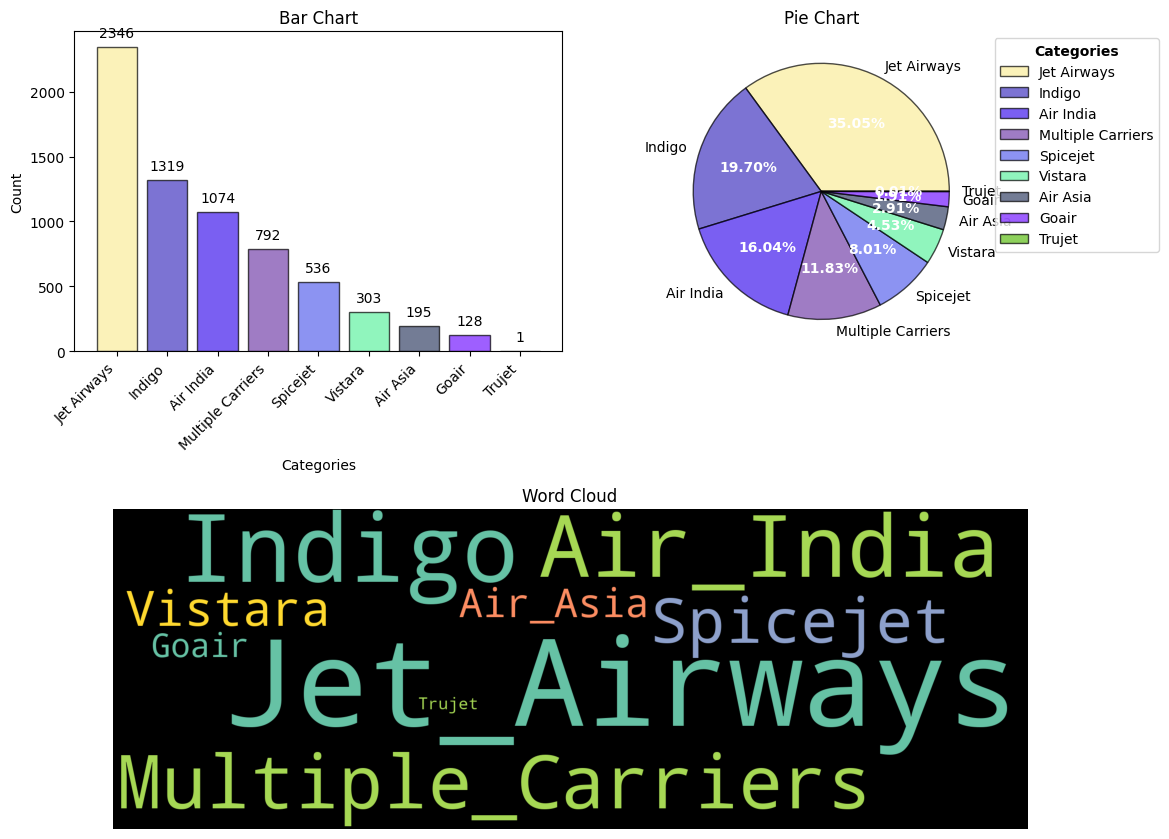

In [24]:
eda_helper_functions.cat_univar_plots(temp,"airline",show_wordcloud=True)

### Bivariate Analysis

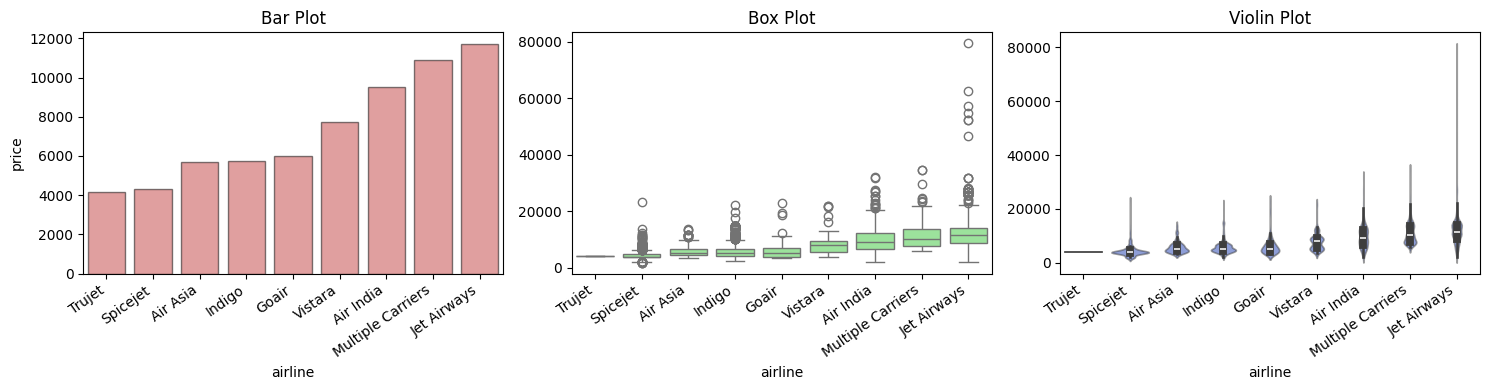

In [25]:
eda_helper_functions.num_cat_bivar_plots(temp,num_var='price',cat_var='airline')

In [26]:
s = ["delhi","kolkata","bangalore"]
d = ["cochin","bangalore","delhi"]
f = ["Jet Airways","Indigo","Air India","Multiple Carriers"]
percent = 0.95
for f1 in f:
    for s1 in s:
        for d1 in d:
            if(s1!=d1):
                temp_df = temp.query(f'airline == "{f1}" & source == "{s1}" & destination == "{d1}"')
                max_value = temp_df['price'].quantile(1)
                ninty_percent_value = temp_df['price'].quantile(percent)
                print(f'airline = {f1} & source = {s1} & destination = {d1}')
                print(f"{int(percent*100)}% value: ",ninty_percent_value," max_value: ",max_value)
    print("----------------------------------------------")
            

airline = Jet Airways & source = delhi & destination = cochin
95% value:  17031.199999999997  max_value:  52285.0
airline = Jet Airways & source = delhi & destination = bangalore
95% value:  nan  max_value:  nan
airline = Jet Airways & source = kolkata & destination = cochin
95% value:  nan  max_value:  nan
airline = Jet Airways & source = kolkata & destination = bangalore
95% value:  nan  max_value:  nan
airline = Jet Airways & source = kolkata & destination = delhi
95% value:  nan  max_value:  nan
airline = Jet Airways & source = bangalore & destination = cochin
95% value:  nan  max_value:  nan
airline = Jet Airways & source = bangalore & destination = delhi
95% value:  nan  max_value:  nan
----------------------------------------------
airline = Indigo & source = delhi & destination = cochin
95% value:  14871.0  max_value:  14871.0
airline = Indigo & source = delhi & destination = bangalore
95% value:  nan  max_value:  nan
airline = Indigo & source = kolkata & destination = cochin
9

### Hypothesis Testing

In [27]:
eda_helper_functions.num_cat_hyp_testing(temp,num_var='price',cat_var='airline')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 434.4699719900389
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 3023.131283616367
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


### Multivariate Analysis

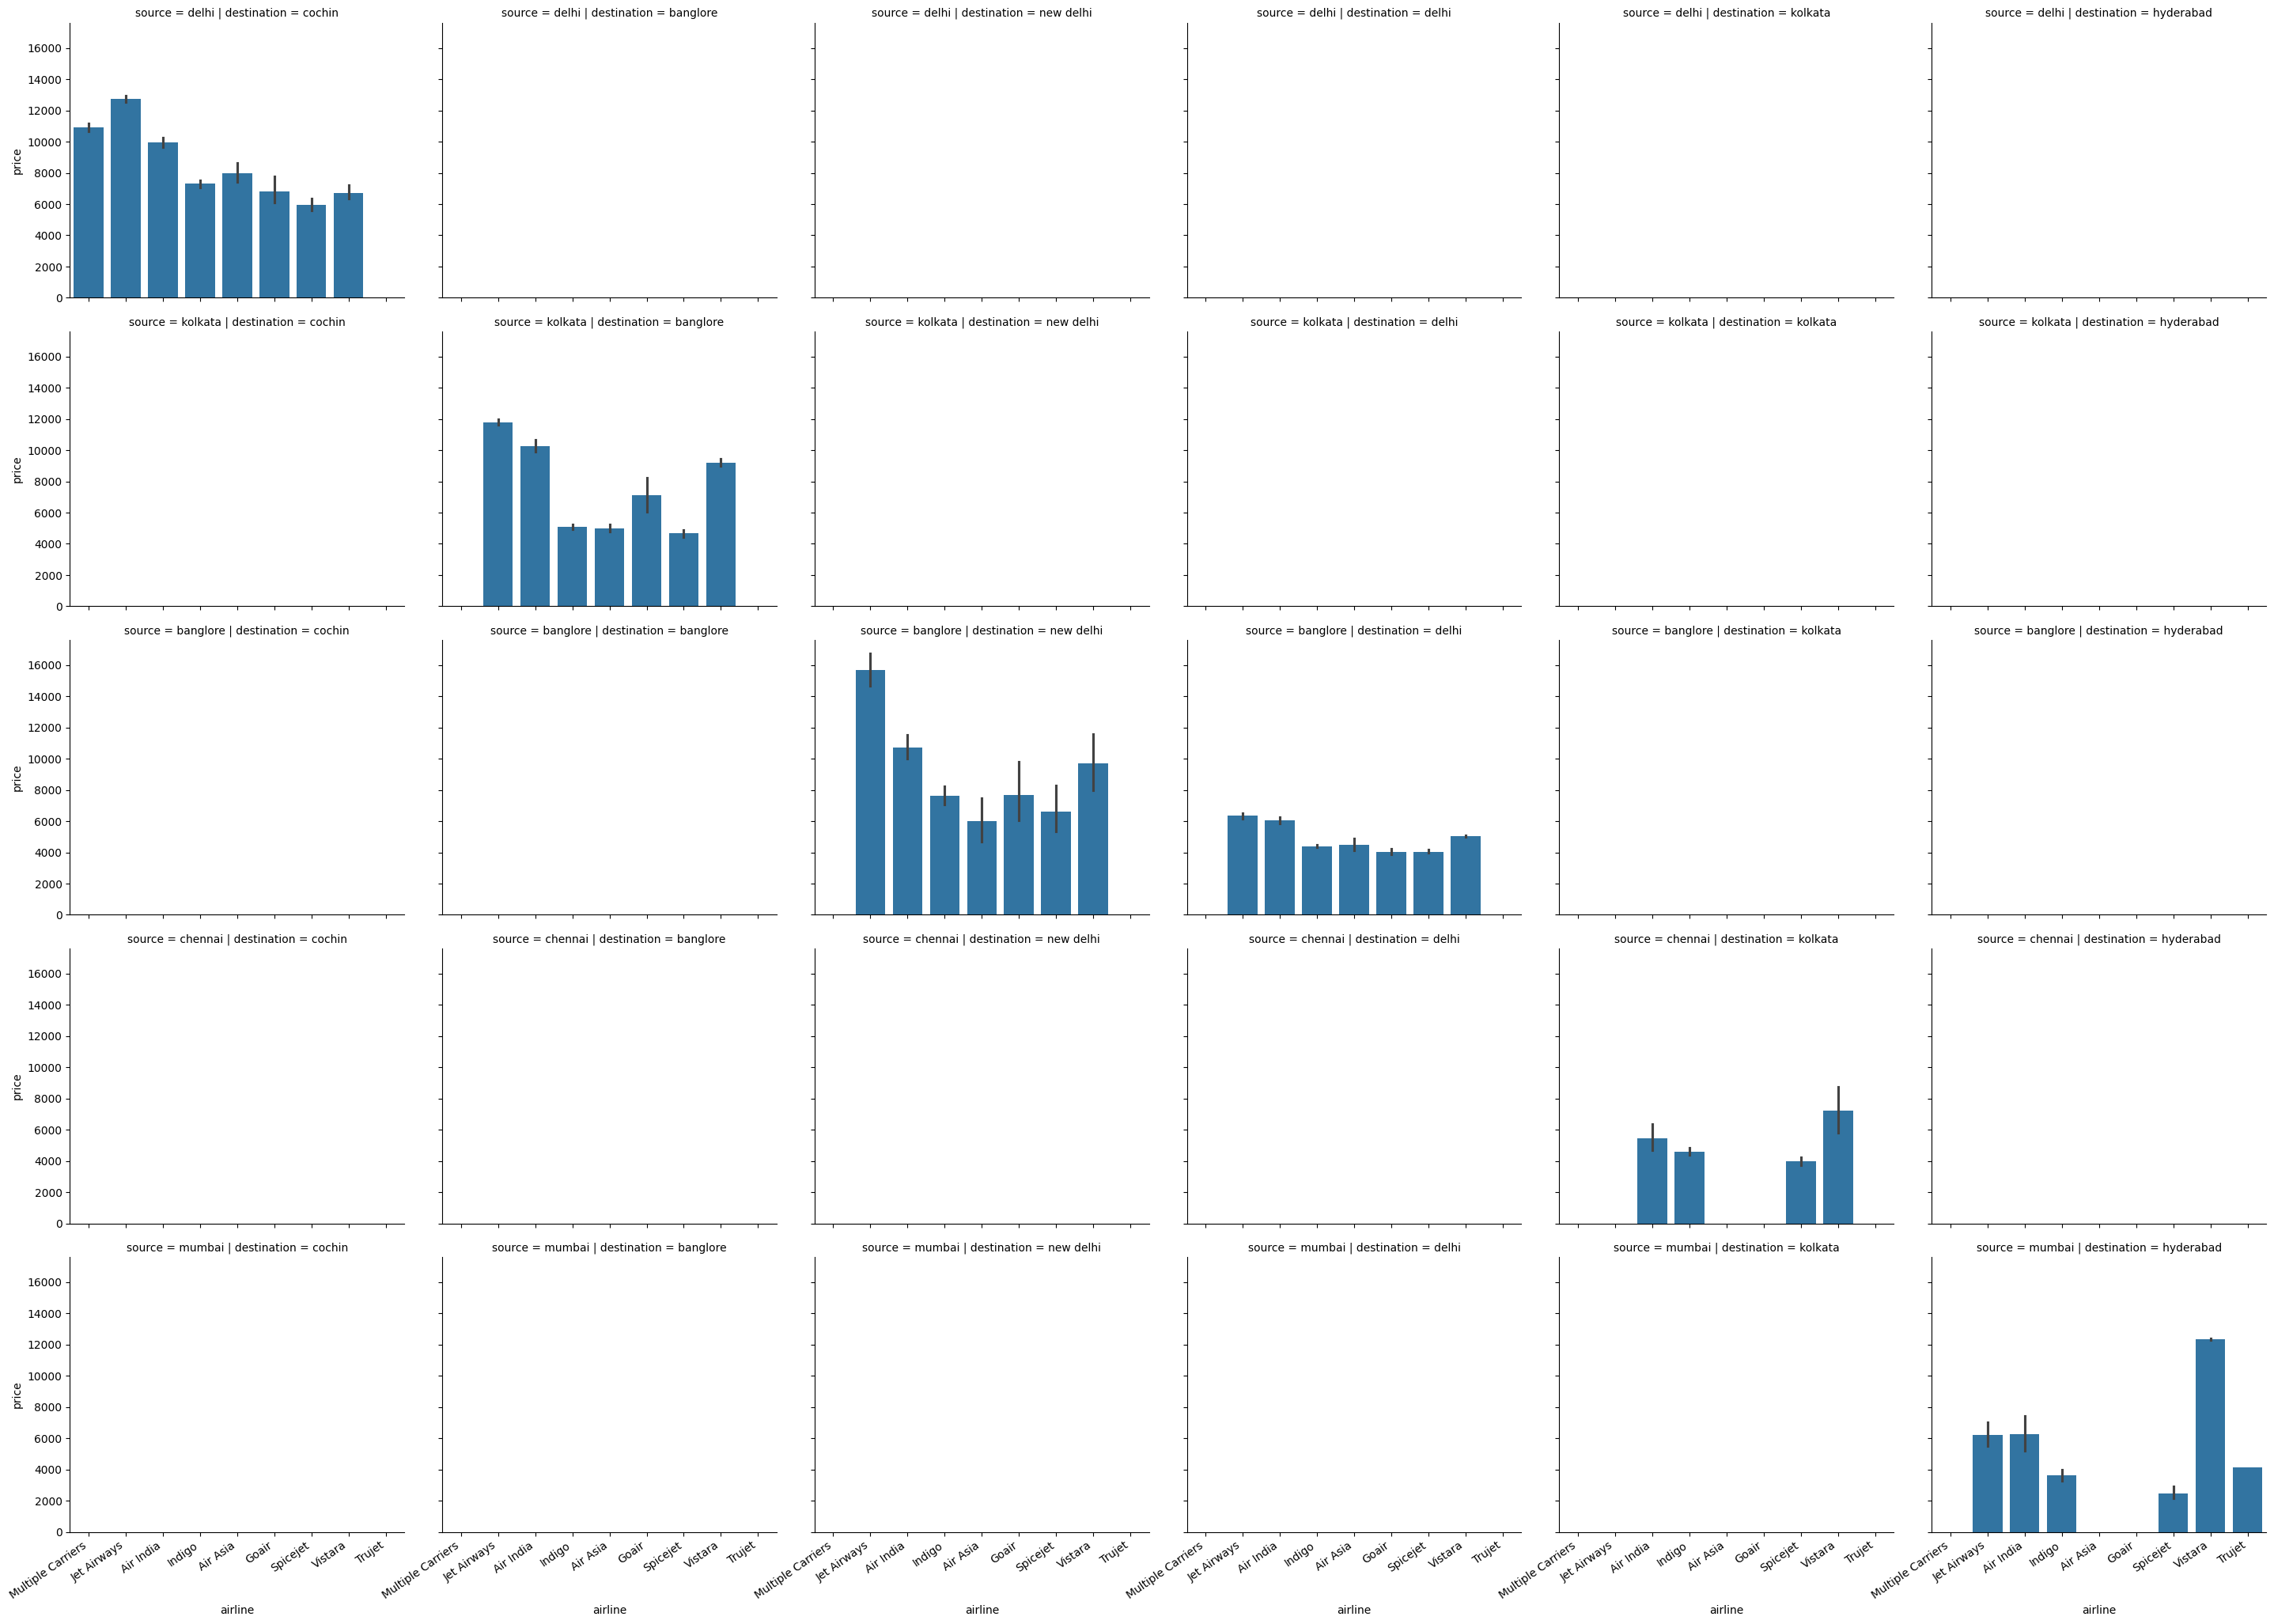

In [28]:

airline_grid = sns.FacetGrid(data = temp,row="source",col="destination",sharey=True,height=4,aspect=1.2)
airline_grid.map(sns.barplot,"airline","price",order = temp.airline.unique())

for ax in airline_grid.axes[4]:
    eda_helper_functions.rotate_xlabels(ax)

In [ ]:
# The above code shows that only flights moves from 
# delhi -> cochin
# kolkata -> banglore
# mumbai -> hyderabad
# banglore -> newdelhi
# banglore -> delhi
# chennai -> kolkata

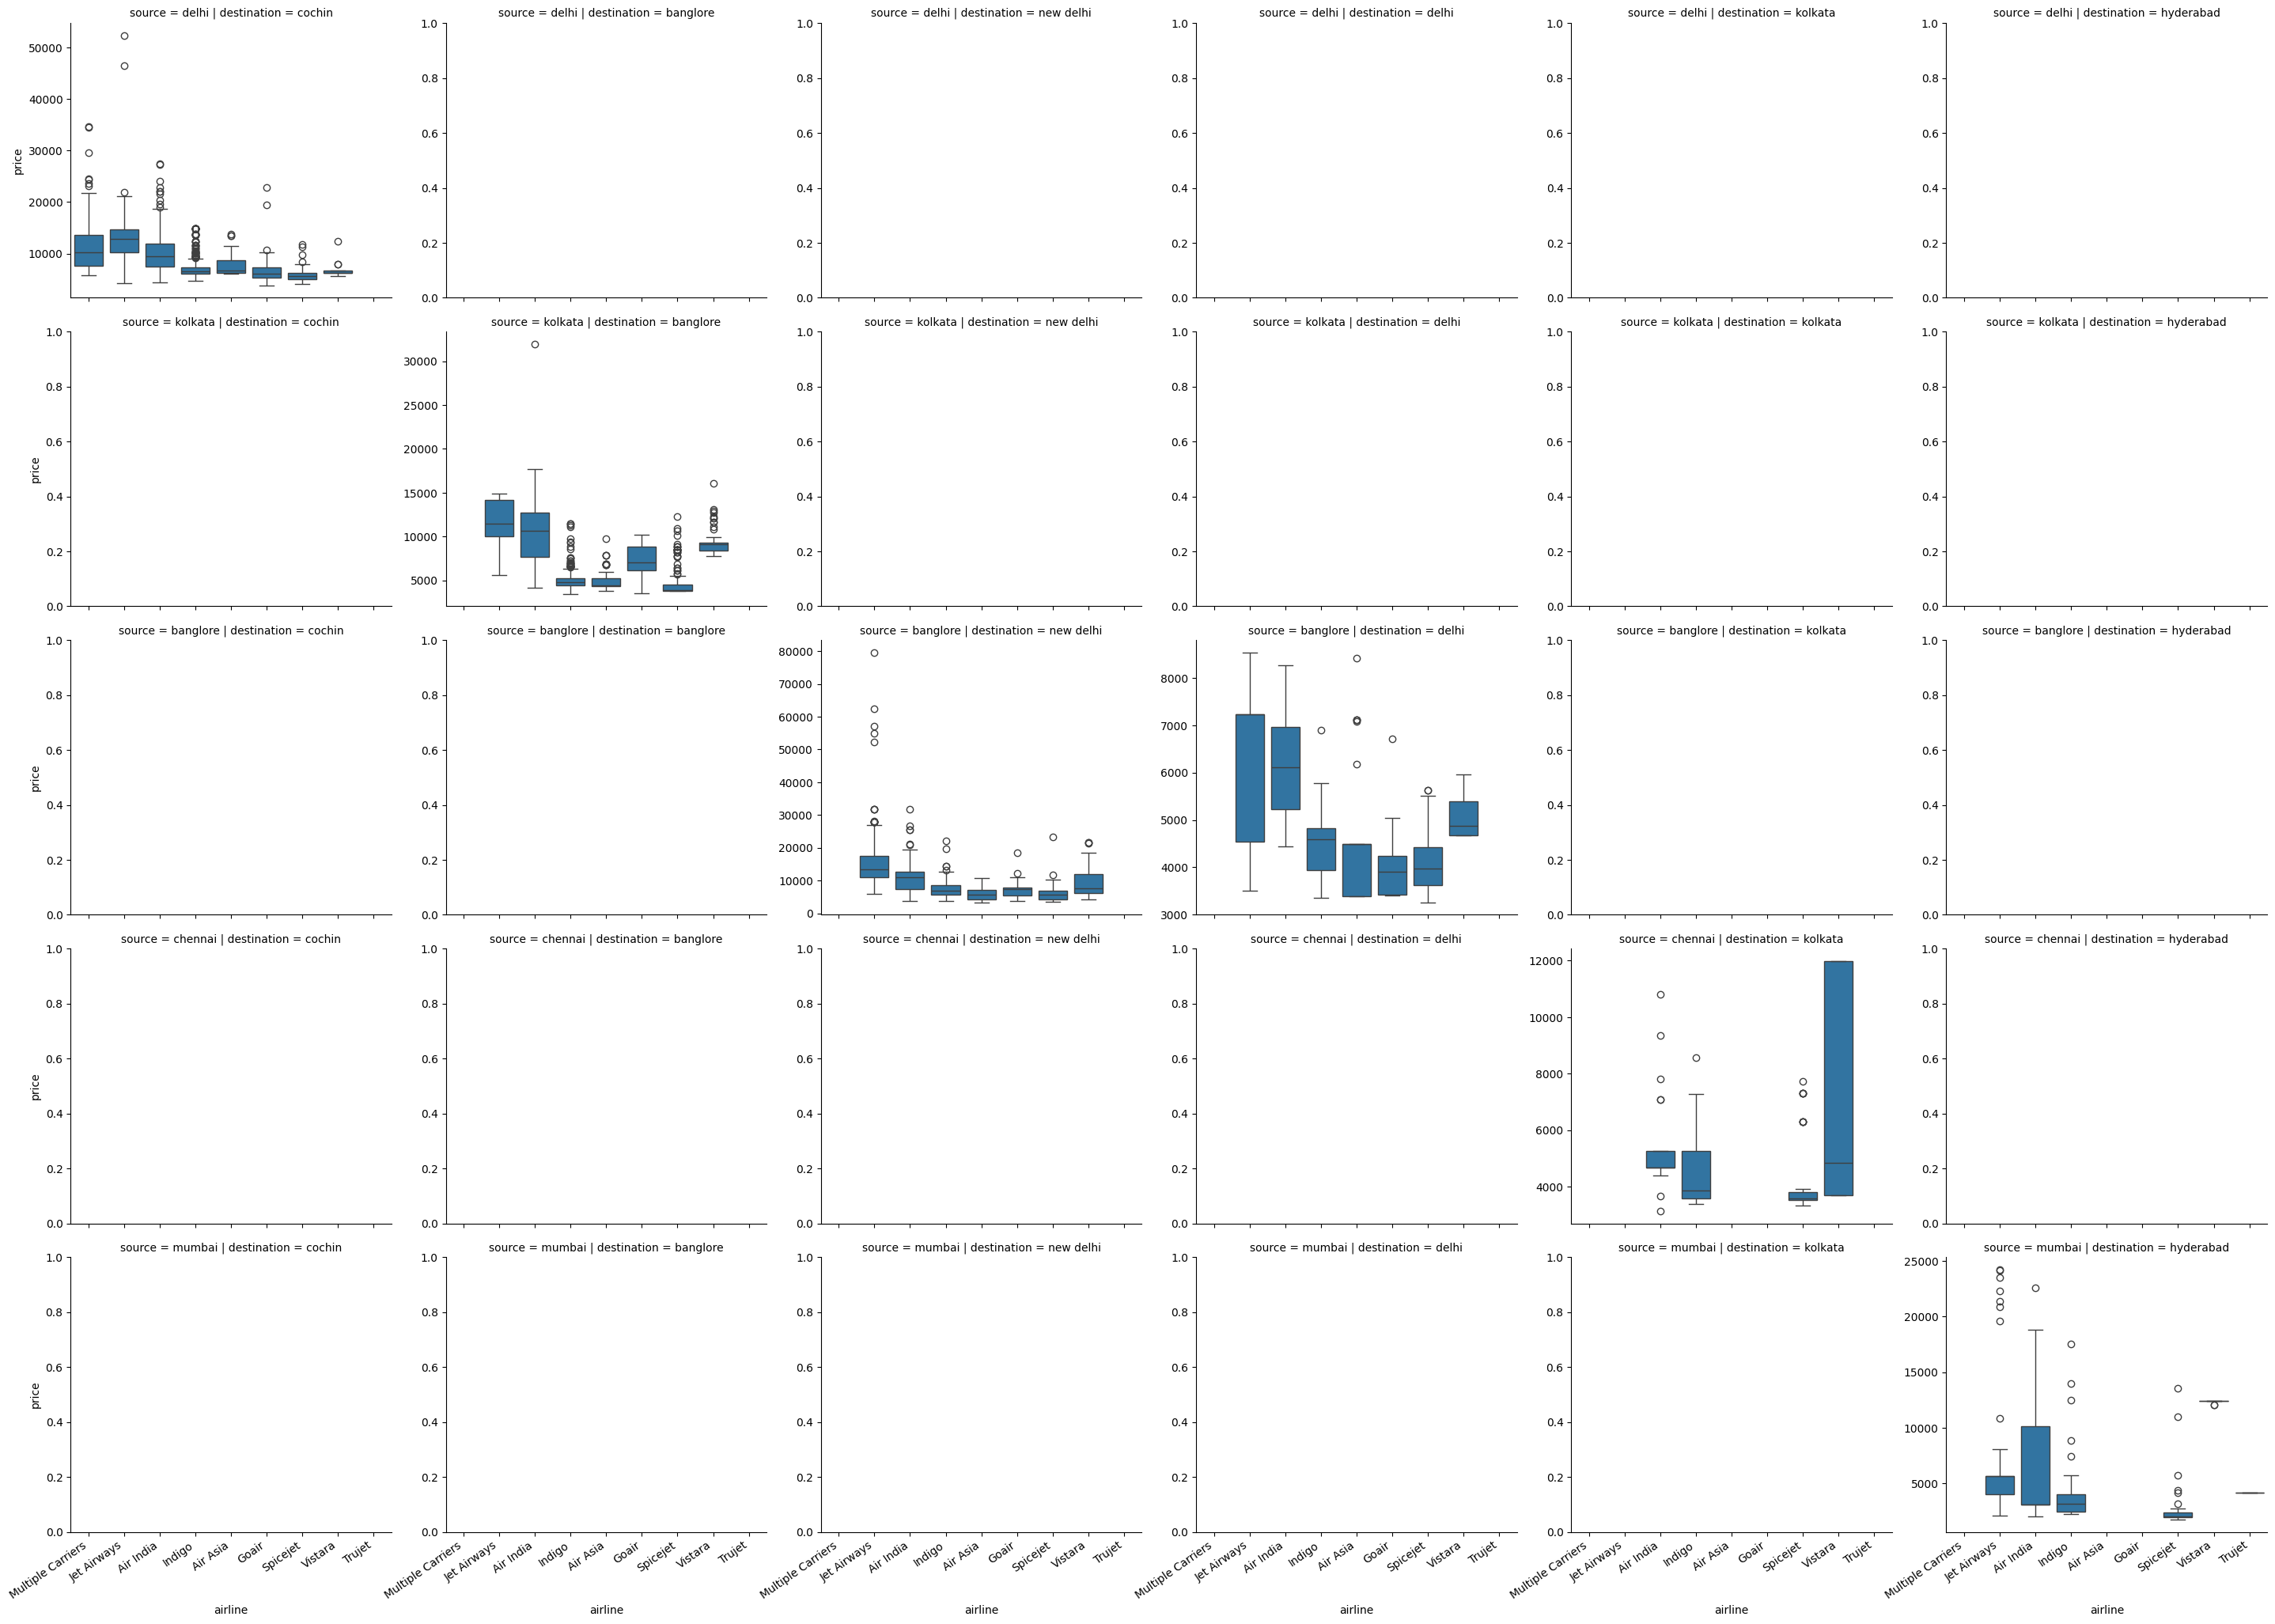

In [30]:
airline_grid = sns.FacetGrid(data = temp,row="source",col="destination",sharey=False,height=4,aspect=1.2)
airline_grid.map(sns.boxplot,"airline","price",order = temp.airline.unique())

for ax in airline_grid.axes[4]:
    eda_helper_functions.rotate_xlabels(ax)

In [31]:
# Rare
# Source = mumbai, chennai
# Destination = new delhi, hyderabad , kolkata

### Analysis on Date of Journey

In [32]:
temp["date"] = pd.to_datetime(temp.rename(columns={'dtoj_year': 'year', 
                                     'dtoj_month': 'month', 
                                     'dtoj_day': 'day'})[['year', 'month', 'day']])
temp.head(2)

,airline,source,destination,duration,total_stops,additional_info,dep_time_hour,dep_time_min,dtoj_day,dtoj_month,dtoj_year,price,date
0,Multiple Carriers,delhi,cochin,615,1,no info,15,15,6,6,2019,6795,2019-06-06
1,Jet Airways,kolkata,banglore,1220,1,in-flight meal not included,20,0,9,6,2019,10844,2019-06-09


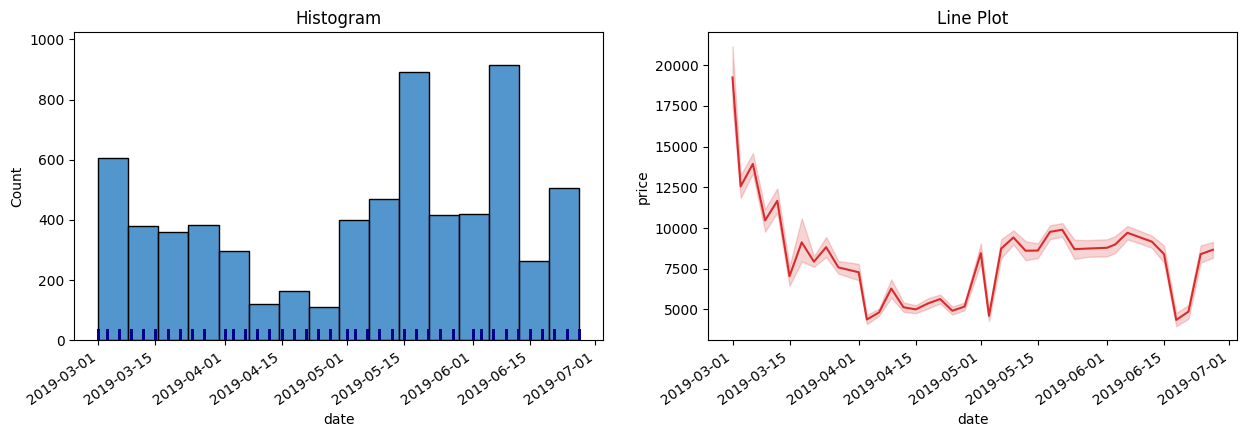

In [33]:
eda_helper_functions.dt_univar_plots(data = temp,var = "date",target="price")

In [34]:
# The above code shows that I have plenty amount of data for march,may,june and less amount of data for april

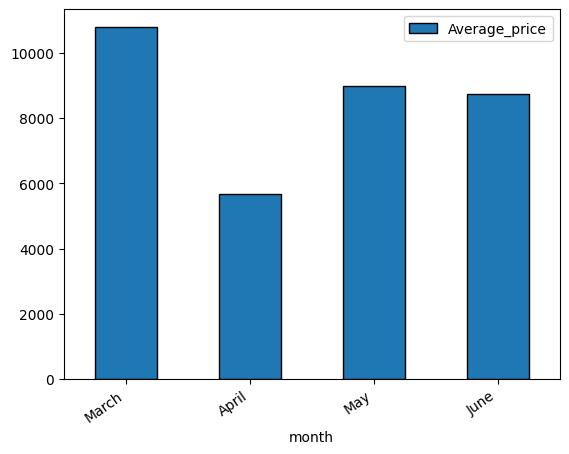

In [35]:
(
temp.groupby(['dtoj_month'])
.price.mean()
.to_frame()
.set_axis(["March","April","May","June"],axis = 0)
.rename_axis(index="month")
.set_axis(["Average_price"],axis = 1)
.plot(kind="bar",edgecolor = "black")
)

# if we have to get the current axes
ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

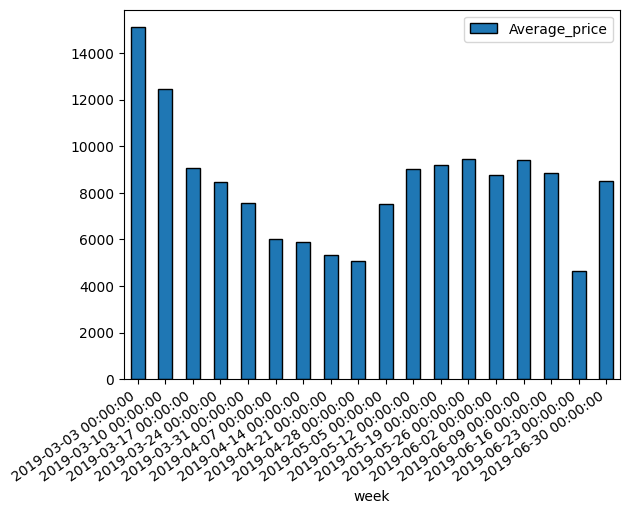

In [36]:
# If we have to get the weekly ananlysis

(
temp.groupby(pd.Grouper(key="date",freq = "W"))
.price.mean()
.to_frame()
.rename_axis(index="week")
.set_axis(["Average_price"],axis = 1)
.plot(kind="bar",edgecolor = "black")
)

# if we have to get the current axes
ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

In [37]:
(
temp.groupby(['dtoj_month','source','destination'])
.price
.mean()
.to_frame()
)

price
dtoj_month source   destination              
3          banglore new delhi    12026.396581
           chennai  kolkata       5628.870130
           delhi    cochin       11677.944993
           kolkata  banglore      8491.771028
           mumbai   hyderabad     7664.669014
4          banglore delhi         5121.982517
           delhi    cochin        6305.761905
           kolkata  banglore      6275.234783
           mumbai   hyderabad     3313.896552
5          banglore delhi         4963.741007
           chennai  kolkata       4330.262500
           delhi    cochin       10600.923077
           kolkata  banglore     10079.408405
           mumbai   hyderabad     3538.768657
6          banglore delhi         5335.144487
           chennai  kolkata       4312.000000
           delhi    cochin       10246.103188
           kolkata  banglore      8996.714943
           mumbai   hyderabad     3614.920635

### Dep_time

In [38]:
temp['dep_time'] = temp['dep_time_hour'].astype(str) + ':' + temp['dep_time_min'].astype(str)
temp['dep_time'] = pd.to_datetime(temp.dep_time,format='%H:%M')
temp['dep_time']

0      1900-01-01 15:15:00
1      1900-01-01 20:00:00
2      1900-01-01 10:30:00
3      1900-01-01 08:55:00
4      1900-01-01 09:00:00
               ...        
6689   1900-01-01 18:15:00
6690   1900-01-01 20:10:00
6691   1900-01-01 07:55:00
6692   1900-01-01 08:35:00
6693   1900-01-01 09:00:00
Name: dep_time, Length: 6694, dtype: datetime64[ns]

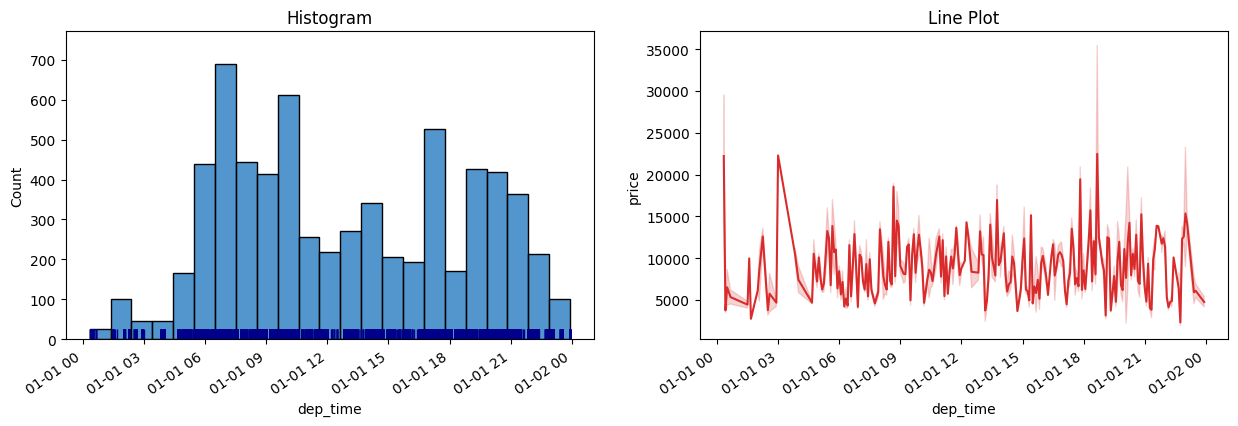

In [39]:
eda_helper_functions.dt_univar_plots(data = temp,var = 'dep_time',target = 'price')

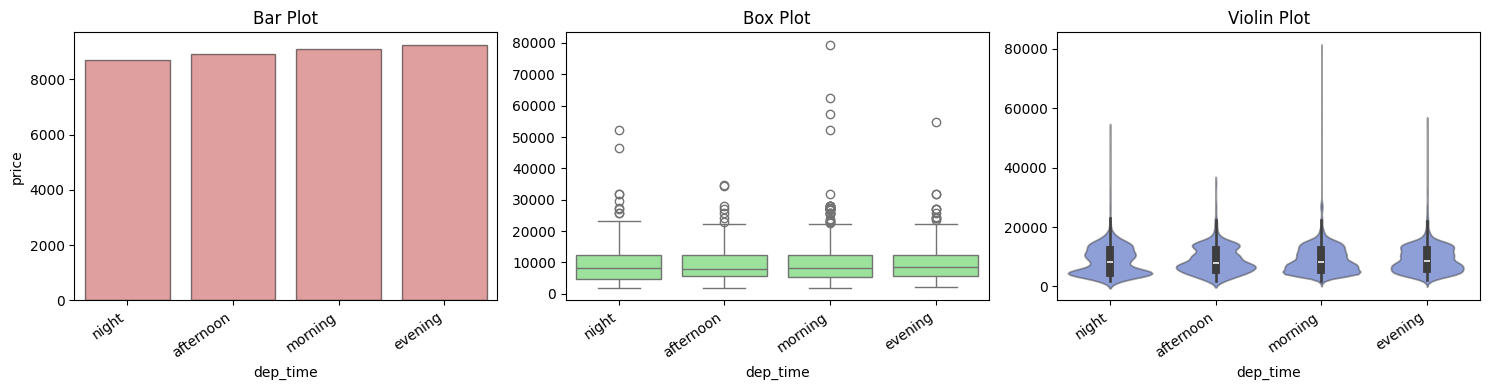

In [40]:
(
    temp.assign(
        dep_time = lambda df_:( np.select([df_.dep_time.dt.hour.between(4,12,inclusive = 'left'),
                                          df_.dep_time.dt.hour.between(12,16,inclusive = 'left'),
                                          df_.dep_time.dt.hour.between(16,20,inclusive = 'left')],
                                          ["morning",
                                           "afternoon",
                                           "evening"],
                                          default = 'night')))
    
    .pipe(eda_helper_functions.num_cat_bivar_plots,'price','dep_time')
)

### Analysis on Duration

In [41]:
eda_helper_functions.num_summary(data = temp,var = 'duration')

0        615
1       1220
2        655
3       1365
4        720
        ... 
6689     610
6690     660
6691     140
6692     520
6693     150
Name: duration, Length: 6694, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 6,694 / 6,694 rows


,value
percentile,
0,75.0
5,90.0
10,145.0
25,170.0
50,500.0
75,895.0
90,1430.0
95,1595.0
99,1855.0


,value
mean,620.808186
trimmed mean (5%),586.265350
trimmed mean (10%),556.426438
median,500.000000


,value
var,246051.543062
std,496.035828
IQR,725.000000
mad,330.000000
coef_variance,0.799016


,value
skewness,0.941227
kurtosis,0.028629


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 1.2442685951400628e-57
Test Statistic       : 0.8816629745675049
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 259.98975644862367
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


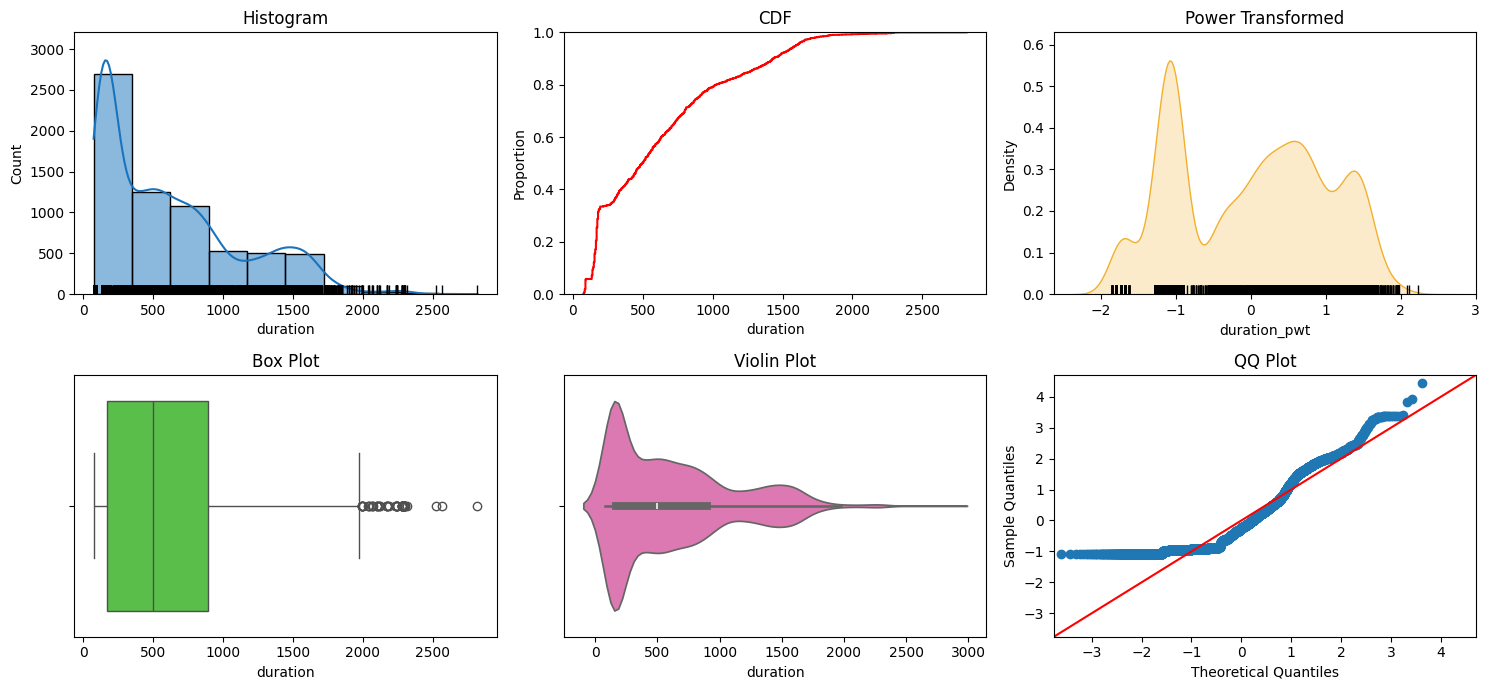

In [42]:
eda_helper_functions.num_univar_plots(data = temp,var='duration')

In [43]:
"Bi-variate Analysis between duration and price"

eda_helper_functions.num_num_hyp_testing(data = temp,var1='duration',var2='price')

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.495888676718791
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and price are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6985748832312249
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and price are correlated


In [44]:
correlation_matrix = temp[['duration','price']].corr()
correlation_matrix

,duration,price
duration,1.000000,0.495889
price,0.495889,1.000000


In [45]:
# The above code shows that duration and price are correlated

### Multivariate Analysis

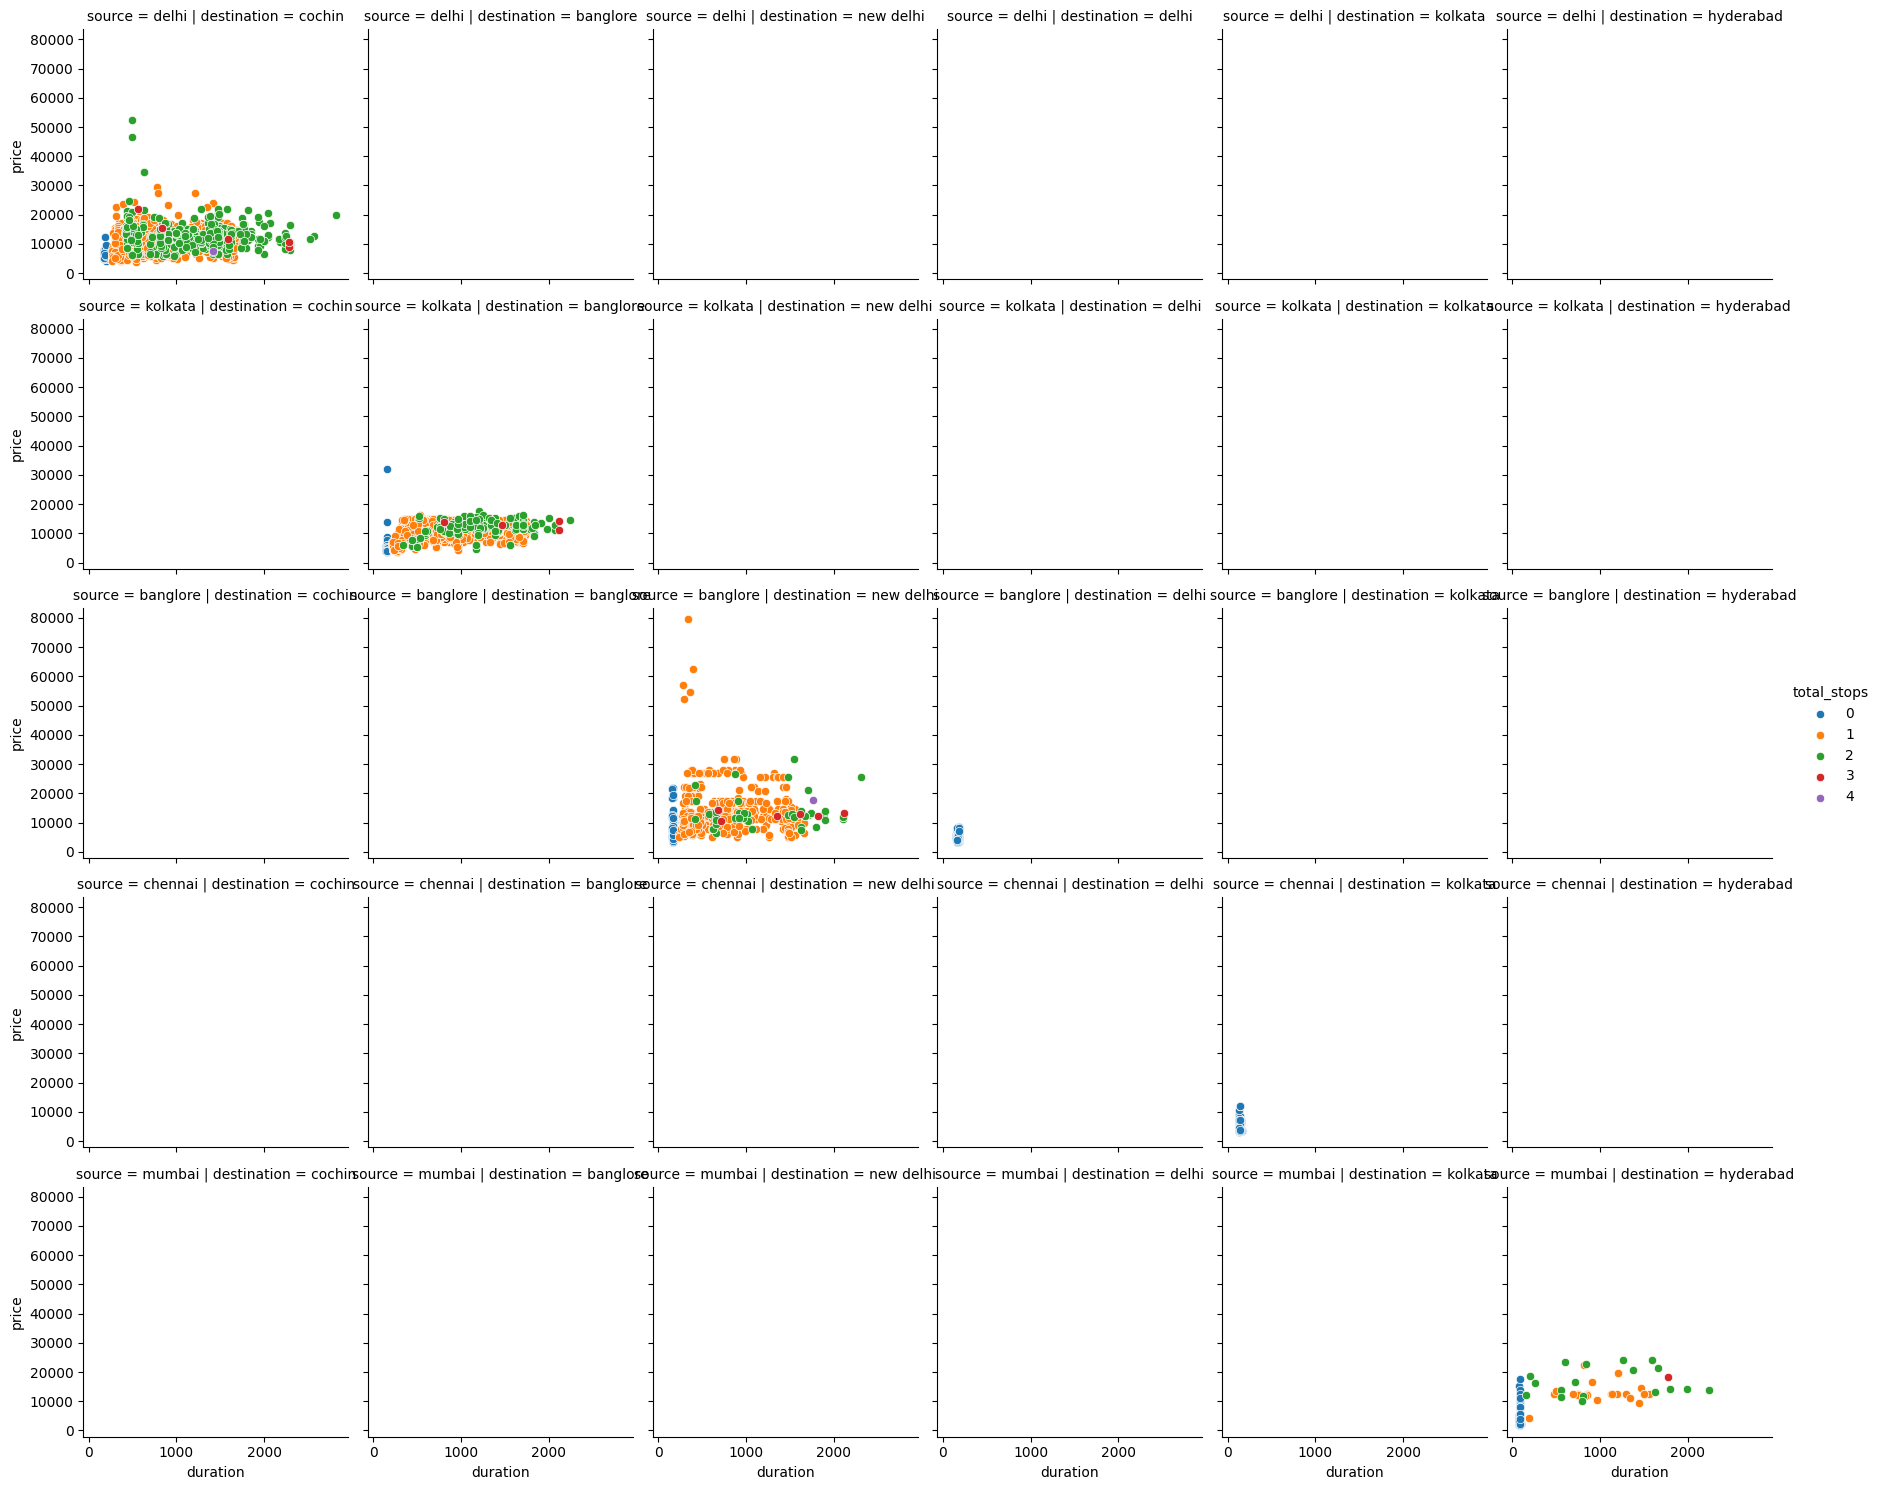

In [46]:
duration_grid = sns.FacetGrid(data = temp
                              ,row='source'
                              ,col='destination'
                              ,sharey=True
                              ,hue = 'total_stops')
duration_grid.map(sns.scatterplot,'duration','price')

# For adding the label of hue
duration_grid.add_legend()


In [47]:
eda_helper_functions.num_num_hyp_testing(data = temp,var1='duration',var2='total_stops')

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.7290871917574007
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and total_stops are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.8243171997704114
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and total_stops are correlated


In [48]:
# Shows that the duration and total_stops are correlated with each other

In [49]:
eda_helper_functions.get_iqr_outliers(data = temp,var='duration')

Lower Limit : -917.5
Upper Limit : 1982.5


,airline,source,destination,duration,total_stops,additional_info,dep_time_hour,dep_time_min,dtoj_day,dtoj_month,dtoj_year,price,date,dep_time
1505,Jet Airways,delhi,cochin,1995,2,in-flight meal not included,19,10,27,3,2019,6643,2019-03-27,1900-01-01 19:10:00
4601,Jet Airways,delhi,cochin,1995,2,no info,19,10,27,3,2019,10929,2019-03-27,1900-01-01 19:10:00
6306,Air India,mumbai,hyderabad,1995,2,no info,6,0,6,3,2019,14219,2019-03-06,1900-01-01 06:00:00
5251,Jet Airways,delhi,cochin,1995,2,no info,19,10,21,3,2019,10929,2019-03-21,1900-01-01 19:10:00
6385,Jet Airways,delhi,cochin,1995,2,in-flight meal not included,19,10,6,3,2019,16022,2019-03-06,1900-01-01 19:10:00
6449,Air India,kolkata,banglore,2000,2,no info,13,55,24,3,2019,15292,2019-03-24,1900-01-01 13:55:00
715,Jet Airways,delhi,cochin,2040,2,no info,18,25,21,3,2019,12347,2019-03-21,1900-01-01 18:25:00
4396,Jet Airways,delhi,cochin,2045,2,no info,18,20,21,3,2019,13082,2019-03-21,1900-01-01 18:20:00
4603,Jet Airways,delhi,cochin,2045,2,no info,18,20,3,3,2019,20747,2019-03-03,1900-01-01 18:20:00
4875,Air India,kolkata,banglore,2065,2,no info,5,50,1,5,2019,10991,2019-05-01,1900-01-01 05:50:00
